# EDA Lab - GSS Exploration

## Data Descriptions and Reasoning


For my Exploratory Data Analysis I am looking to explore how certain job circumstances and benefits affect how satisfied and loyal a person is with their job. I am hoping to see if there are any relationships between some job qualities and if one plays more of a role than another. From the General Social Survey (GSS) I have chosen the variables year, commute, joblose, satjob, idecide, notloyal, fringe1, fringe6, and fringe11 to explore any trends and correlations.

The satjob variable represents the respondent’s work satisfaction. The specific survey question was “On the whole, how satisfied are you with the work you do--would you say you are very satisfied, moderately satisfied, a little dissatisfied, or very dissatisfied?”. I included this variable in order to have a measure for how happy someone is with their job. The notloyal variable represents how little loyalty a respondent feels to an organization. The specific question asked was “Please tell me how much you agree or disagree with the following statements. Would you say that you strongly agree, agree, disagree, or strongly disagree?”. I included this variable to explore how having certain job qualities can affect loyalty.

The commute variable represents the time it takes for the respondent to travel to their work. The specific survey question asked was “About how much time (does/did) it usually take you to travel to work - about how many minutes?”. I wanted to include this variable because it might be important to someone how far away they are from work due to convenience. Furthermore, there might be associated travel costs that factor into how happy someone would be with their job.

The joblose variable represents how likely the respondent is to lose their job. The specific survey question was “Thinking about the next 12 months, how likely do you think it is that you will lose your job or be laid off--very likely, fairly likely, not too likely, or not at all likely?”. I included this variable because job security might be an important factor.

The idecide variable represents if the respondent’s job allows them to make part decisions. The specific survey question was “How true would you say each of the following statements is about your job? Would you say very true, true, somewhat true, or not true at all”. I included this variable because though I feel it can depend on the person how much they want to be in control at a job, this can show what people generally prefer.

The fringe1 variable represents if the respondent’s job includes medical or hospital insurance. The specific question asked was “I am going to read a list of fringe benefits that workers sometimes get in addition to their wages. Whether you receive it or not, please tell me whether you are eligible to receive each fringe benefit. A. Medical or hospital insurance”. The fringe6 variable represents if the respondent gets flexible hours and/or flexible scheduling. The specific question asked was “I am going to read a list of fringe benefits that workers sometimes get in addition to their wages. Whether you receive it or not, please tell me whether you are eligible to receive each fringe benefit. F. Flexible hours, or flextime scheduling”. The fringe11 variable represents if the respondent gets assistance with the costs of day care for children. The specific question asked was “I am going to read a list of fringe benefits that workers sometimes get in addition to their wages. Whether you receive it or not, please tell me whether you are eligible to receive each fringe benefit. K. Assistance with the costs of day care for children”. I included these 3 fringe variables because they are important factors one might consider in addition to general wages.

I also included the year variable to help analyze more patterns.



Overall Summary:
1. satjob - work satisfaction
2. notloyal - how little loyalty felt to organization
3. commute - time to travel to work
4. joblose - how likely to lose job
5. idecide - job allows making part decisions
6. fringe1 - medical or hospital insurance offered
7. fringe6 - felixible hours and/or flexible schedule offered
8. fringe11 - assistance with costs of day care for children offered
9. year


## Getting the Data

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables (adjust as necessary)
var_list = ['year','satjob', 'notloyal', 'commute', 'joblose', 'idecide', 
            'fringe1', 'fringe6', 'fringe11']
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    if phase == 0 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='w', # control write versus append
                                header=var_list, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode
    elif phase == 1 :
        df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                                mode='a', # control write versus append
                                header=None, # variable names
                                index=False) # no row index saved
        phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
https://github.com/DS3001/project_gss/raw/main/gss_chunk_2.parquet
https://github.com/DS3001/project_gss/raw/main/gss_chunk_3.parquet


In [26]:
# Loading the data using Pandas
import pandas as pd

df = pd.read_csv('selected_gss_data.csv')
df.head()


/var/folders/zr/fb7f6x8n33dfsp92rr2qp16c0000gn/T/ipykernel_20046/1761593955.py:4: DtypeWarning: Columns (2,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('selected_gss_data.csv')


,year,satjob,notloyal,commute,joblose,idecide,fringe1,fringe6,fringe11
0,1972,a little dissatisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1972,moderately satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1972,very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [36]:
# Getting general information about the data
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Drop rows where all variables are missing
df_clean = df.dropna(how='all')

# Check the data types of all columns
print(df_clean.dtypes)

# Note: no need to coerce any of the datatypes since upon checking, we can see that the year is of type int, commute is of type float, and the rest are objects (which makes sense because they are include strings/text)

# Strip leading/trailing spaces and standardize text to lowercase
df_clean = df_clean.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Filling missing values with 'unknown' for categorical variables
categorical_vars = ['satjob', 'notloyal', 'joblose', 'idecide', 'fringe1', 'fringe6', 'fringe11']
df_clean[categorical_vars] = df_clean[categorical_vars].fillna('unknown')

# Check the cleaned data
df_clean.head(20)


               year      commute
count  72390.000000  1330.000000
mean    1997.715541    20.245865
std       15.109995    17.082472
min     1972.000000     0.000000
25%     1985.000000    10.000000
50%     1998.000000    15.000000
75%     2010.000000    30.000000
max     2022.000000    97.000000
year            0
satjob      20503
notloyal    71496
commute     71060
joblose     47643
idecide     71490
fringe1     71496
fringe6     71501
fringe11    71535
dtype: int64
year          int64
satjob       object
notloyal     object
commute     float64
joblose      object
idecide      object
fringe1      object
fringe6      object
fringe11     object
dtype: object


,year,satjob,notloyal,commute,joblose,idecide,fringe1,fringe6,fringe11
0,1972,a little dissatisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
1,1972,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown
2,1972,moderately satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
3,1972,very satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
4,1972,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown
5,1972,moderately satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
6,1972,very satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
7,1972,a little dissatisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
8,1972,moderately satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown
9,1972,moderately satisfied,unknown,NaN,unknown,unknown,unknown,unknown,unknown


## Numeric Summaries

Commute Time Summary:
count    1330.000000
mean       20.245865
std        17.082472
min         0.000000
25%        10.000000
50%        15.000000
75%        30.000000
max        97.000000
Name: commute, dtype: float64

Frequency of satjob:
satjob
very satisfied           24718
unknown                  20503
moderately satisfied     19854
a little dissatisfied     5157
very dissatisfied         2158
Name: count, dtype: int64

Frequency of notloyal:
notloyal
unknown              71496
disagree               401
strongly disagree      336
agree                  113
strongly agree          44
Name: count, dtype: int64

Frequency of joblose:
joblose
unknown                47643
not likely             15577
not too likely          6629
fairly likely           1416
very likely             1120
leaving labor force        5
Name: count, dtype: int64

Frequency of idecide:
idecide
unknown            71490
true                 335
very true            321
somewhat true        132
not true at al

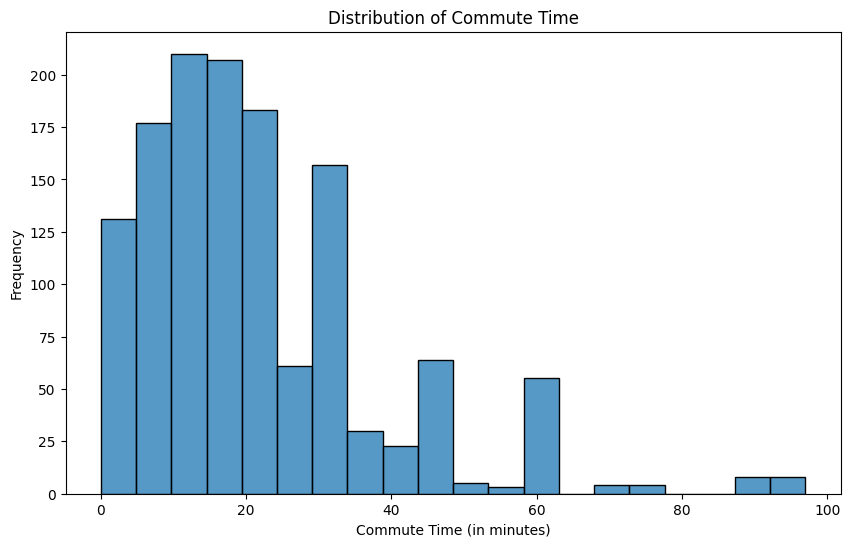

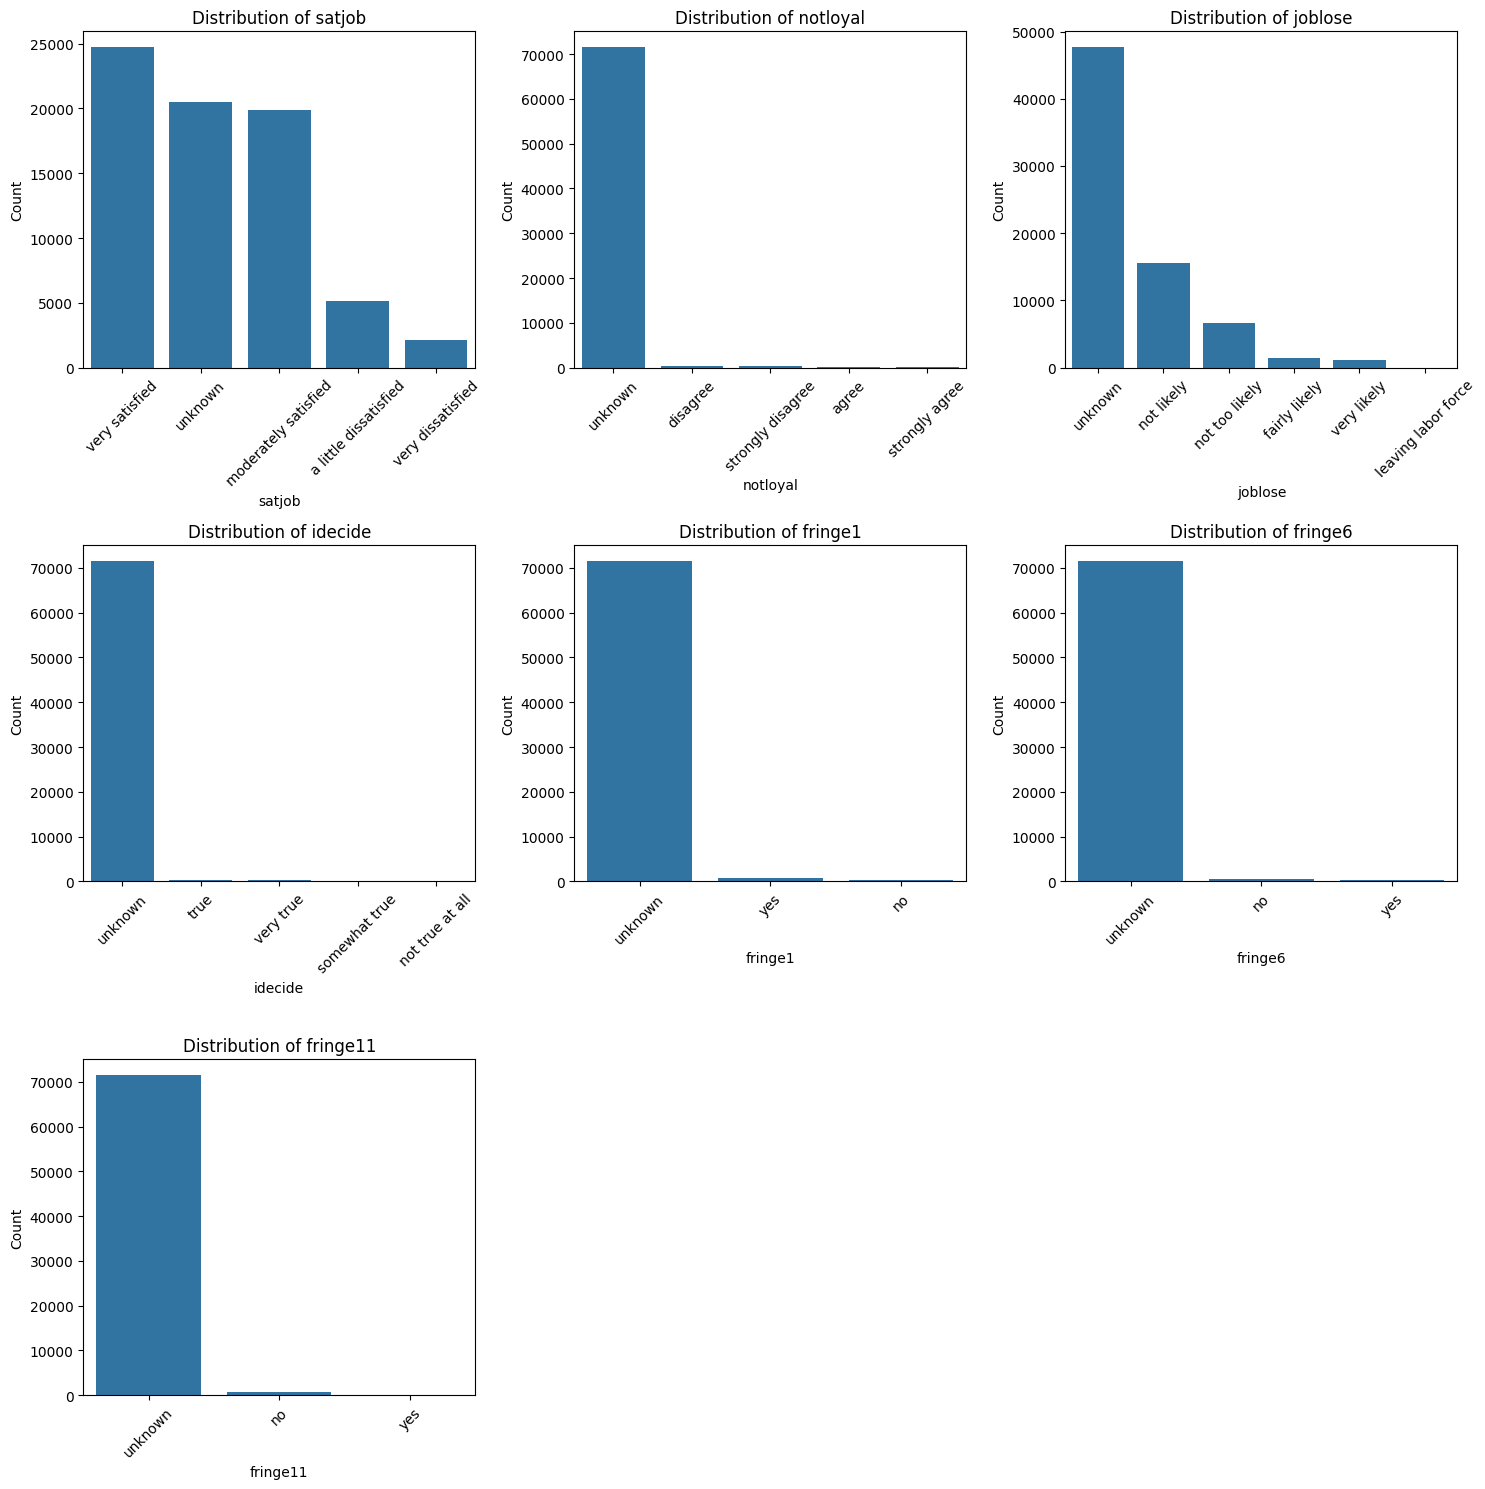

In [107]:
# Numeric summary for commute time
print("Commute Time Summary:")
print(df_clean['commute'].describe())

# Frequency counts for categorical variables
for var in categorical_vars:
    print(f"\nFrequency of {var}:")
    print(df_clean[var].value_counts())

#Plot for commute
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['commute'], bins=20)
plt.title('Distribution of Commute Time')
plt.xlabel('Commute Time (in minutes)')
plt.ylabel('Frequency')
plt.show()

# Plot bar charts for categorical variables
import math
num_vars = len(categorical_vars)
cols = 3
rows = math.ceil(num_vars / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()
for i, var in enumerate(categorical_vars):
    sns.countplot(x=df_clean[var], order=df_clean[var].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



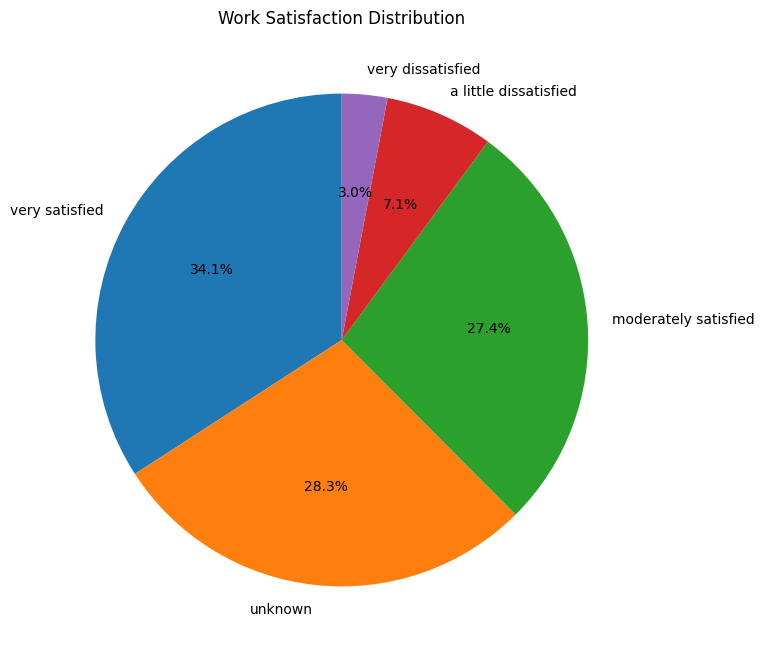

In [104]:
# Pie chart for 'satjob'
plt.figure(figsize=(8, 8))
df_clean['satjob'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Work Satisfaction Distribution')
plt.ylabel('')
plt.show()


## Visualizations

/var/folders/zr/fb7f6x8n33dfsp92rr2qp16c0000gn/T/ipykernel_20046/1984237302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='satjob', y='commute', data=df_clean, palette='coolwarm')


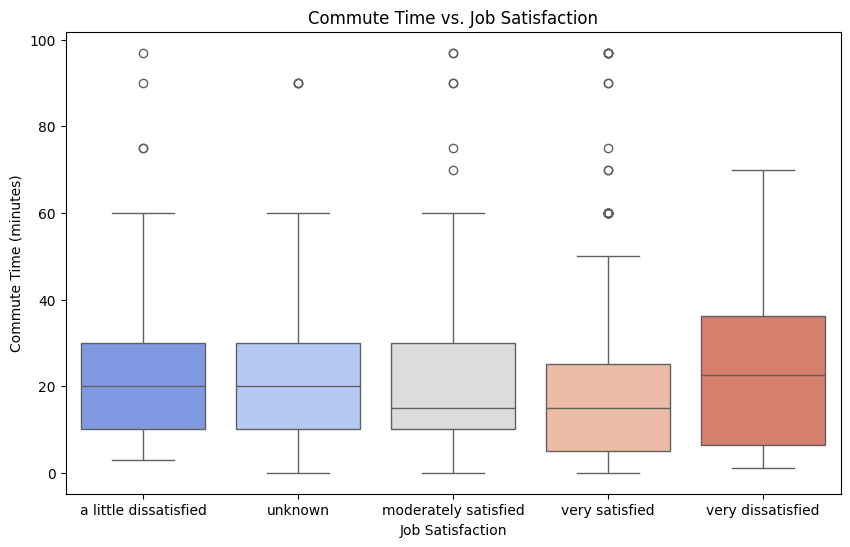

In [82]:
# Box plot for Commute vs. Job Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='satjob', y='commute', data=df_clean, palette='coolwarm')
plt.title('Commute Time vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Commute Time (minutes)')
plt.show()


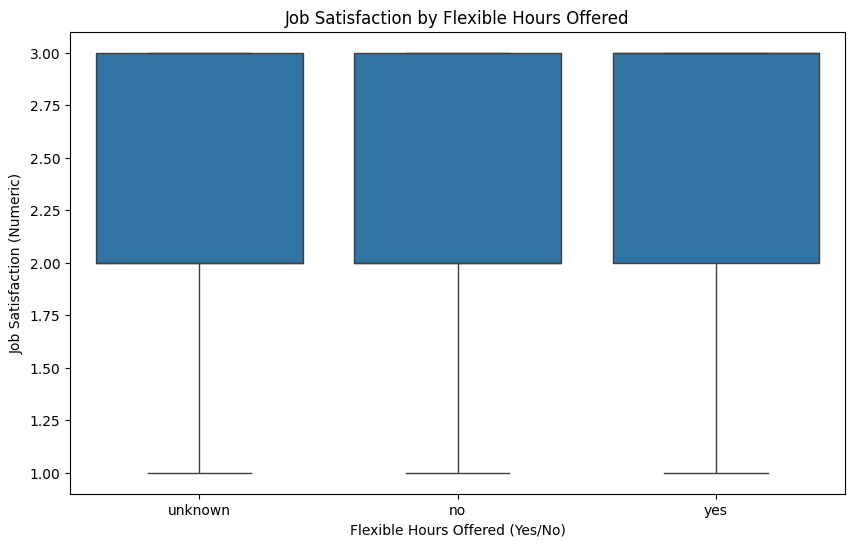

In [90]:
# Box plot for Job Satisfaction by Flexible Hours Offered
plt.figure(figsize=(10, 6))
sns.boxplot(x='fringe6', y='satjob_numeric', data=df_clean)
plt.title('Job Satisfaction by Flexible Hours Offered')
plt.xlabel('Flexible Hours Offered (Yes/No)')
plt.ylabel('Job Satisfaction (Numeric)')
plt.show()

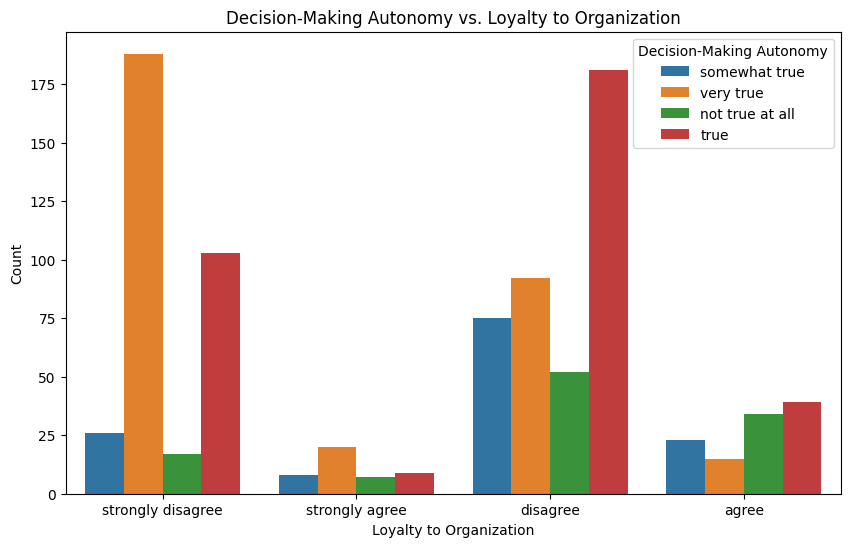

In [79]:
# Filter out rows where 'idecide' or 'notloyal' is 'unknown'
df_filtered = df_clean[df_clean['idecide'] != 'unknown']
df_filtered = df_filtered[df_filtered['notloyal'] != 'unknown']

# Bar plot for Decision-Making Autonomy vs. Loyalty, excluding 'unknown'
plt.figure(figsize=(10, 6))
sns.countplot(x='notloyal', hue='idecide', data=df_filtered)
plt.title('Decision-Making Autonomy vs. Loyalty to Organization')
plt.xlabel('Loyalty to Organization')
plt.ylabel('Count')
plt.legend(title='Decision-Making Autonomy', loc='upper right')
plt.show()



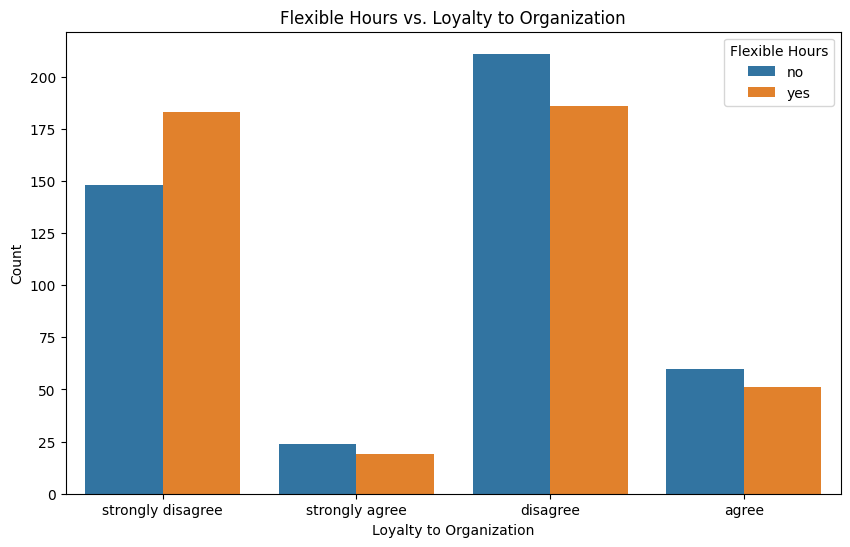

In [78]:
# Filter out rows where 'fringe6' or 'notloyal' is 'unknown'
df_filtered = df_clean[df_clean['fringe6'] != 'unknown']
df_filtered = df_filtered[df_filtered['notloyal'] != 'unknown']

# Bar plot for Flexible Hours vs. Loyalty, excluding 'unknown'
plt.figure(figsize=(10, 6))
sns.countplot(x='notloyal', hue='fringe6', data=df_filtered)
plt.title('Flexible Hours vs. Loyalty to Organization')
plt.xlabel('Loyalty to Organization')
plt.ylabel('Count')
plt.legend(title='Flexible Hours', loc='upper right')
plt.show()


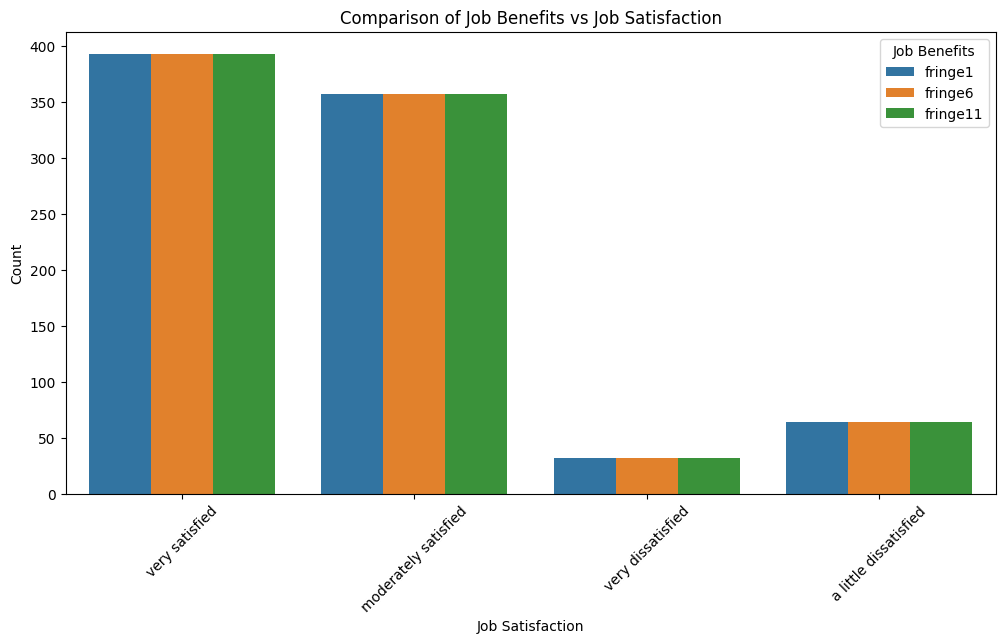

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only relevant columns and exclude 'unknown' values
df_benefits = df_clean[['satjob', 'fringe1', 'fringe6', 'fringe11']].replace('unknown', None).dropna()

# Melt the dataframe to make it suitable for a grouped bar chart
df_melted = df_benefits.melt(id_vars=['satjob'], var_name='Benefit', value_name='Offered')

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='satjob', hue='Benefit')
plt.title('Comparison of Job Benefits vs Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Job Benefits', loc='upper right')
plt.xticks(rotation=45)
plt.show()



## Findings

The two box plots (the first two graphs) show the relationship between job satisfaction and specific job related factors, particularly the commute time and flexible working hours. From the commute vs job satisfaction graph we can see that median commute times seem similar regardless of whether people are "a little dissatisfied," "moderately satisfied," or "very satisfied”. There are instead outliers with longer commute times across all groups, which may indicate that a small number of people travel significantly more than the average. Thus we can conclude that commute time alone may not be a decisive factor in job satisfaction for most people, although extreme commute lengths could negatively affect satisfaction. In the job satisfaction vs flexible hours offered graph, we can see that the median job satisfaction remains roughly the same across "unknown," "no," and "yes" categories. The spread of job satisfaction (range between highest and lowest) is also similar, suggesting that flexible hours may not significantly sway satisfaction levels. Thus we can conclude that while flexible hours are often considered a desirable perk, this data suggests they may not directly increase job satisfaction in a substantial way.

From the bar chart that illustrates Decision-making Autonomy vs Loyalty to the organization we can see that those who agree or strongly agree with being loyal to the organization are more likely to have higher decision-making autonomy (red and blue bars for the agree, orange and red bars for the strongly agree). Thus, we can conclude that employees who feel empowered to make decisions are more likely to feel loyal to their organization, suggesting that autonomy fosters stronger organizational commitment. However, it is also true that people who disagree with being loyal also generally have more of a say in decisions. This could make sense because employees who have more decision-making power may feel more independent and less tied to the organization. They might see themselves as valuable contributors but not necessarily loyal to the company itself. Nonetheless, we can see a correlation between autonomy and job loyalty. 

In the bar graph that shows flexible hours vs loyalty, we can see that people who disagree, agree, and strongly agree with being loyal are more likely to not have flexible hours. Only those who strongly disagree with being loyal are more likely to have flexible hours. This could make sense if some employees with flexible hours may feel detached. While flexibility is often seen as a benefit, some employees may feel less engaged or disconnected from their organization, leading to lower loyalty. Overall, we can conclude that flexible hours alone are not enough to foster loyalty. Loyalty could also be influenced by job type. If employees without flexible hours are in roles that naturally encourage more connection with the company (e.g., leadership positions, roles requiring collaboration), that might explain why they express higher loyalty.

From the grouped bar chart, we can see the relationship between job benefits (fringe1, fringe6, fringe11) and job satisfaction levels. Very satisfied employees dominate the chart as they receive all three benefits the most. Moderately satisfied employees also have high counts, but slightly lower than the very satisfied group. Dissatisfied employees (both "a little dissatisfied" and "very dissatisfied") are very few, meaning fewer people in these groups are getting benefits. Thus, we can conclude that having job benefits (like medical insurance, flexible hours, and childcare assistance) correlates with higher job satisfaction.

Overall, the analysis suggests that while certain job conditions and benefits are associated with job satisfaction and loyalty, no single factor alone determines these outcomes. Commute time and flexible hours, often considered important job aspects, do not appear to have a strong direct impact on satisfaction levels. However, decision-making autonomy shows a clear relationship with loyalty—employees who have more control over their work tend to feel more committed to their organization, though some may also feel more independent rather than loyal. Flexible hours, on the other hand, do not seem to foster loyalty, and in some cases, may even contribute to detachment from the organization. Finally, job benefits such as medical insurance, flexible scheduling, and childcare assistance show a strong correlation with higher job satisfaction, suggesting that employees who receive these benefits tend to be more satisfied with their jobs. While these findings highlight key workplace trends, they also suggest that job satisfaction and loyalty are likely influenced by a combination of factors rather than any single condition alone.
